# scalarField 标量场类型使用

In [11]:
import numpy as np
import openfoamparser as ofp 

from nfvm.mesh.triangleMesh import TriangleMesh
from nfvm.field.volScalarField import volScalarField
import nfvm.fvc as fvc

从文件 ../resources/foam_cavity/mesh/cavity.nfvm 加载网格信息 ...
文件版本：0.1.0
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


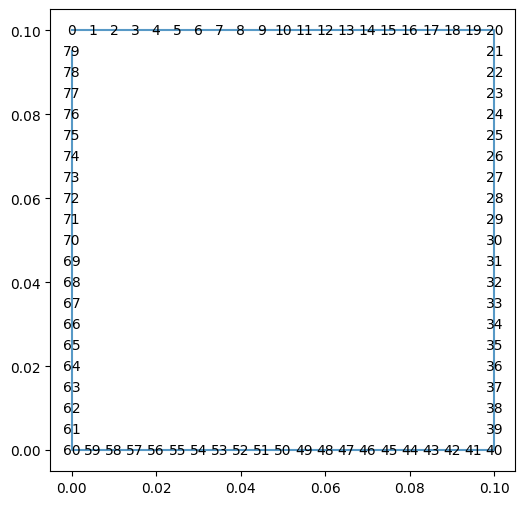

In [12]:
mesh = TriangleMesh.load("../resources/foam_cavity/mesh/cavity.nfvm")
mesh.showBoundary(pause=False)

## 构造一个体积标量场

In [13]:
# 从oepnfoam中加载体积标量数据
pdata = ofp.parse_internal_field('../resources/foam_cavity/10/p')
pdata.shape

(940,)

In [14]:
# 构造一个体积标量场
# boundaryDict指定k,b，通过 x = kx_b + b_b 计算得到边界条件
# k=0时就是定值边界， k=1.0,b=0.0就是0梯度边界条件，
# k!=0, b!=0则可以应对特定梯度边界条件
pVol = volScalarField("p", mesh, value=pdata, boundaryDict={'k':1.0, 'b':0.0})

## 插值得到一个界面标量场

In [23]:
pSuface = fvc.scalarInterpolate(pVol, scheme='linear')
# gT: volScalarField
# phi = fvc.flux(gT) = fvc.scalarInterpolate(gT)*S
# pSuface = fvc.scalarInterpolate(pVol, scheme='upwind', phi=1)

In [26]:
pSuface[:10]

array([-0.00330954,  0.01818702, -0.04011023,  0.00792873,  0.01219549,
        0.01027709, -0.20891928, -0.23780631, -0.29105724,  0.0920115 ])

In [17]:
# 和openfoam对比下边界面上的插值结果
boundary_index = np.loadtxt('../resources/foam_cavity/mesh/boundary_index.txt', dtype=np.int32)

index = boundary_index[:20]
value_move = [0 for i in range(20)]
for i,v in enumerate(pSuface[-80:-60]):
    value_move[index[i]] = v
print(value_move)

[-0.359383, -0.854546, -0.114955, 0.260807, -0.0269454, -0.148793, -0.0893758, -0.466597, 2.24521, 0.161924, 0.700295, 0.0115777, 0.0491202, 5.7724, -5.33933, -1.77959, -0.199615, 1.05529, 0.0670771, 0.400621]
